## 处理化学场的观测数据
## `Chem Variables Observation Data`

---
*@author: Evan*\
*@date: 2022-08-27*

In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 允许显示中文
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

## 读取数据

In [4]:
# read sitelist and lon & lat
sitelist=pd.read_excel('F:/Data/caseGZ_2207/OBS/sitelist.xlsx')
sites=list(sitelist['监测点编码'])
site_lon=sitelist['经度']
site_lat=sitelist['纬度']

In [6]:
# set Obs dataset
path='F:/Data/caseGZ_2207/OBS/'
files=os.listdir(path)
dataset=list(files)
datalist=[]
for fileitem in dataset:
    tmp=pd.read_csv(path+fileitem,usecols=['date','hour','type','1345A','1346A','1347A','1348A','1349A','1350A','1351A','1352A','1353A','1354A','1355A','1356A','1357A','1358A','1359A','1360A','1361A','1362A','1363A','1364A','1365A','1366A','1367A','1368A','1369A','1370A','1379A','1380A','1381A','1382A','1383A','1384A','1385A','1386A','1387A','1388A','1389A','1390A','1391A','1392A','1393A','1394A','1395A','1396A','1397A','1398A','1399A','1400A','1669A','1670A','1671A','1672A','1673A','1696A','1697A','1698A','1699A','1700A','1701A','1702A','1703A','1704A','1712A','1713A','1714A','2846A','3025A','3298A','3299A','3300A','3301A','3302A','3303A','3304A','3305A','3306A','3307A','3308A','3311A','3313A','3314A','3317A','3318A','3319A','3443A','3445A','3446A','3447A','3448A','3449A','3451A','3452A','3453A','3454A','3455A','3622A','3623A','3626A','3627A','3628A'])
    datalist.append(tmp)
obs_data=pd.concat(datalist,ignore_index=False)
obs_data

,date,hour,type,1345A,1346A,1347A,1348A,1349A,1350A,1351A,...,3451A,3452A,3453A,3454A,3455A,3622A,3623A,3626A,3627A,3628A
0,20220715,0,AQI,25.0,25.0,NaN,20.0,26.0,15.0,29.0,...,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,16.0
1,20220715,0,PM2.5,10.0,13.0,NaN,8.0,9.0,7.0,12.0,...,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,9.0
2,20220715,0,PM2.5_24h,16.0,13.0,NaN,10.0,11.0,11.0,18.0,...,14.0,5.0,10.0,4.0,25.0,19.0,5.0,10.0,11.0,7.0
3,20220715,0,PM10,25.0,25.0,NaN,20.0,26.0,15.0,29.0,...,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,16.0
4,20220715,0,PM10_24h,30.0,26.0,NaN,23.0,27.0,24.0,35.0,...,24.0,12.0,17.0,15.0,39.0,41.0,17.0,24.0,26.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,20220728,23,O3_24h,229.0,259.0,NaN,259.0,291.0,265.0,165.0,...,146.0,205.0,117.0,213.0,183.0,169.0,220.0,263.0,317.0,152.0
356,20220728,23,O3_8h,160.0,193.0,NaN,191.0,209.0,180.0,130.0,...,96.0,151.0,109.0,138.0,92.0,120.0,127.0,180.0,226.0,118.0
357,20220728,23,O3_8h_24h,205.0,234.0,NaN,232.0,262.0,230.0,152.0,...,125.0,174.0,111.0,179.0,147.0,154.0,174.0,225.0,275.0,139.0
358,20220728,23,CO,0.8,0.8,NaN,0.9,0.8,1.0,0.8,...,0.6,0.3,0.6,0.8,0.8,0.6,0.5,0.9,0.7,0.5


In [57]:
df=obs_data.groupby('type')
O3_obs=df.get_group('O3')
O3_obs

,date,hour,type,1345A,1346A,1347A,1348A,1349A,1350A,1351A,...,3451A,3452A,3453A,3454A,3455A,3622A,3623A,3626A,3627A,3628A
9,20220715,0,O3,24.0,24.0,NaN,11.0,8.0,26.0,30.0,...,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,27.0,41.0
24,20220715,1,O3,26.0,19.0,NaN,20.0,6.0,21.0,31.0,...,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,37.0
39,20220715,2,O3,22.0,16.0,NaN,18.0,4.0,27.0,27.0,...,26.0,24.0,40.0,34.0,41.0,79.0,17.0,24.0,27.0,33.0
54,20220715,3,O3,20.0,21.0,NaN,23.0,3.0,27.0,20.0,...,18.0,35.0,39.0,30.0,22.0,69.0,16.0,29.0,28.0,26.0
69,20220715,4,O3,21.0,25.0,NaN,18.0,4.0,25.0,25.0,...,15.0,34.0,37.0,27.0,15.0,58.0,15.0,34.0,34.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,20220728,19,O3,178.0,246.0,NaN,234.0,260.0,NaN,130.0,...,102.0,163.0,112.0,136.0,106.0,128.0,130.0,212.0,270.0,138.0
309,20220728,20,O3,135.0,192.0,NaN,201.0,220.0,180.0,134.0,...,96.0,144.0,117.0,115.0,95.0,115.0,87.0,153.0,207.0,115.0
324,20220728,21,O3,121.0,147.0,NaN,151.0,159.0,128.0,138.0,...,71.0,133.0,109.0,96.0,75.0,99.0,77.0,117.0,159.0,89.0
339,20220728,22,O3,106.0,106.0,NaN,108.0,107.0,95.0,126.0,...,60.0,136.0,100.0,88.0,57.0,84.0,79.0,101.0,124.0,92.0


In [7]:
df=obs_data.groupby('type')
NO2_obs=df.get_group('NO2')
NO2_obs

,date,hour,type,1345A,1346A,1347A,1348A,1349A,1350A,1351A,...,3451A,3452A,3453A,3454A,3455A,3622A,3623A,3626A,3627A,3628A
7,20220715,0,NO2,27.0,24.0,NaN,33.0,42.0,16.0,27.0,...,NaN,NaN,3.0,6.0,NaN,21.0,44.0,NaN,21.0,7.0
22,20220715,1,NO2,21.0,25.0,NaN,22.0,40.0,21.0,20.0,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,7.0
37,20220715,2,NO2,23.0,24.0,NaN,24.0,40.0,15.0,21.0,...,4.0,28.0,2.0,6.0,16.0,13.0,26.0,20.0,19.0,7.0
52,20220715,3,NO2,23.0,19.0,NaN,22.0,37.0,13.0,25.0,...,4.0,14.0,3.0,8.0,19.0,11.0,27.0,16.0,17.0,9.0
67,20220715,4,NO2,21.0,15.0,NaN,22.0,35.0,12.0,19.0,...,4.0,9.0,4.0,8.0,19.0,12.0,28.0,9.0,13.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,20220728,19,NO2,25.0,25.0,NaN,26.0,36.0,19.0,13.0,...,4.0,8.0,5.0,9.0,NaN,10.0,25.0,29.0,27.0,16.0
307,20220728,20,NO2,32.0,29.0,NaN,27.0,41.0,21.0,15.0,...,4.0,8.0,4.0,10.0,6.0,11.0,31.0,30.0,24.0,19.0
322,20220728,21,NO2,35.0,30.0,NaN,29.0,33.0,18.0,16.0,...,4.0,8.0,4.0,11.0,8.0,15.0,27.0,20.0,21.0,15.0
337,20220728,22,NO2,34.0,26.0,NaN,28.0,41.0,24.0,19.0,...,4.0,8.0,4.0,13.0,9.0,17.0,21.0,22.0,25.0,12.0


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

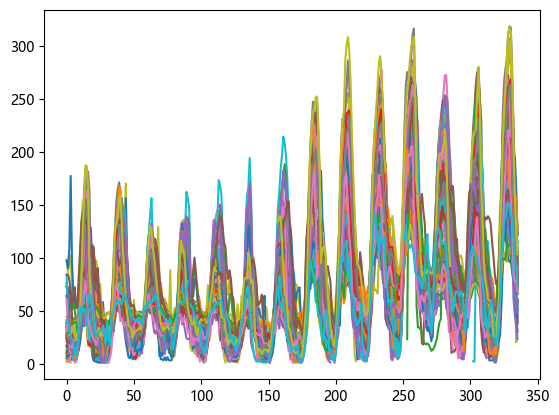

In [78]:
fig=plt.figure()
for i in np.arange(3,103,1):
    plt.plot(range(336),O3_obs.iloc[:,i])
plt.show()

In [79]:
O3_obs.to_excel('O3_obs.xlsx')

In [8]:
NO2_obs.to_excel('NO2_obs.xlsx')